AIT 724 NetworkX Tutorial

Date: Oct 13, 2023




## Installation

In [ ]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import packages

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
# import pandas as pd

## Create a graph

Create an empty graph with no nodes and no edges.

By definition, a Graph is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc). In NetworkX, nodes can be any hashable object e.g., a text string, an image, an XML object, another Graph, a customized node object, etc.



In [ ]:
G = nx.Graph()
# print(G.nodes()) # returns a list
# print(G.edges()) # returns a list

The graph G can be grown in several ways. You can add one node at a time, or add nodes from any iterable container, such as a list.

In [ ]:
# add nodes
G.add_node('A') # add one single node
G.add_nodes_from(['B', 'C', 'D', 'E', 'F']) # add multiple nodes

G can also be grown by adding one edge at a time, by adding a list of edges.

In [ ]:
# add eddes
G.add_edge(*('A','B')) # add one edge
# G.add_edges_from([('A','C'), ('B','D'), ('B','E'), ('C', 'E')]) # add multiple edges
G.add_weighted_edges_from([('A','C', 1), ('B','D', 3), ('B','E', 4), ('C', 'E', 1)]) # add multiple weighted edges


In [ ]:
print("Vertex set: ",G.nodes())
print("Edge set: ",G.edges())

Vertex set:  ['A', 'B', 'C', 'D', 'E', 'F']
Edge set:  [('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'E')]


In [ ]:
# remove node
# G.remove_node('A')
# G.remove_nodes_from(['B','C'])

In [ ]:
# remove edge
# G.remove_edge('A','B')

## Exam elements of a graph

We can examine the nodes and edges. Four basic graph properties facilitate reporting: G.nodes, G.edges, G.adj and G.degree. These are set-like views of the nodes, edges, neighbors (adjacencies), and degrees of nodes in a graph. They offer a continually updated read-only view into the graph structure. They are also dict-like in that you can look up node and edge data attributes via the views and iterate with data attributes using methods .items(), .data().

In [ ]:
print('Nodes: ', G.nodes)
print('Edges: ', G.edges)
print('Neighbors of node A: ', G.adj['A'])
print('Degree of node A: ', G.degree['A'])

Nodes:  ['A', 'B', 'C', 'D', 'E', 'F']
Edges:  [('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'E')]
Neighbors of node A:  {'B': {}, 'C': {'weight': 1}}
Degree of node A:  2


## Add attributes

In [ ]:
# add and modify attributes to graph
G1 = nx.Graph(day="Tuesday")
print('Added attributes', G1.graph)
G1.graph['day'] = "Monday"
print('Modified attributes', G1.graph)

Added attributes {'day': 'Tuesday'}
Modified attributes {'day': 'Monday'}


In [ ]:
# add and modify attributes to nodes
G1.add_node(1, time='5pm')
G1.add_node(2, time='3pm')
G1.add_nodes_from([3], time='2pm')
print('Added attributes', G1.nodes.data())
G1.nodes[3]['time'] = '12pm'
print('Modified attributes', G1.nodes.data())

Added attributes [(1, {'time': '5pm'}), (2, {'time': '3pm'}), (3, {'time': '2pm'})]
Modified attributes [(1, {'time': '5pm'}), (2, {'time': '3pm'}), (3, {'time': '12pm'})]


In [ ]:
# add and modify attributes to edges
G1.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
print('Added attributes', G1.edges.data())
G1[1][2]['color'] = 'green'
print('Modified attributes', G1.edges.data())

Added attributes [(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})]
Modified attributes [(1, 2, {'color': 'green'}), (2, 3, {'weight': 8})]


## Displaying graph

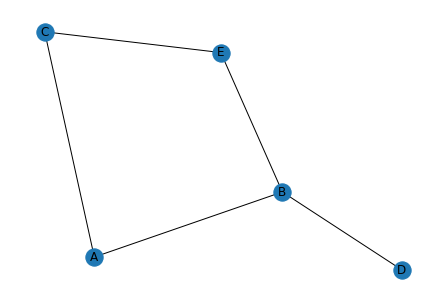

In [ ]:
# display unweighted graph
nx.draw(G, with_labels=True)
plt.show()

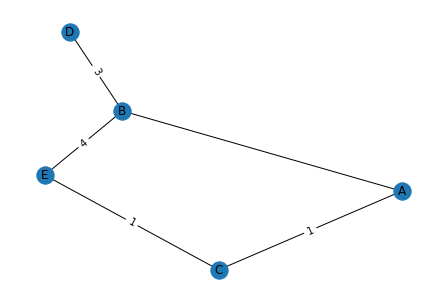

In [ ]:
#display a weighted graph
pos=nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
edge_weight = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
plt.show()


## Network Analysis using Karate Graph

Zachary's karate club is a social network of a university karate club, described in the paper "An Information Flow Model for Conflict and Fission in Small Groups" by Wayne W. Zachary. The network became a popular example of community structure in networks after its use by Michelle Girvan and Mark Newman in 2002.

In [ ]:
# Load the graph
G_karate = nx.karate_club_graph()

### Graph Information

In [ ]:
# Basic Infomation
print(nx.info(G_karate))

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


In [ ]:
# Degree centraility
# The degree centrality for a node v is the fraction of nodes it is connected to.
# It is used to determine what nodes are most connected.
d_centraility = nx.degree_centrality(G_karate)
print(d_centraility[0])

0.48484848484848486


In [ ]:
# Explore closeness centrality here
# hint: use the closeness_centrality

In [ ]:
# Explore betweenness centrality
# hint: use the betweenness_centrality

In [ ]:
# Explore eigenvector centrality
# hint: use the eigenvector_centrality

### Visualize the Graph

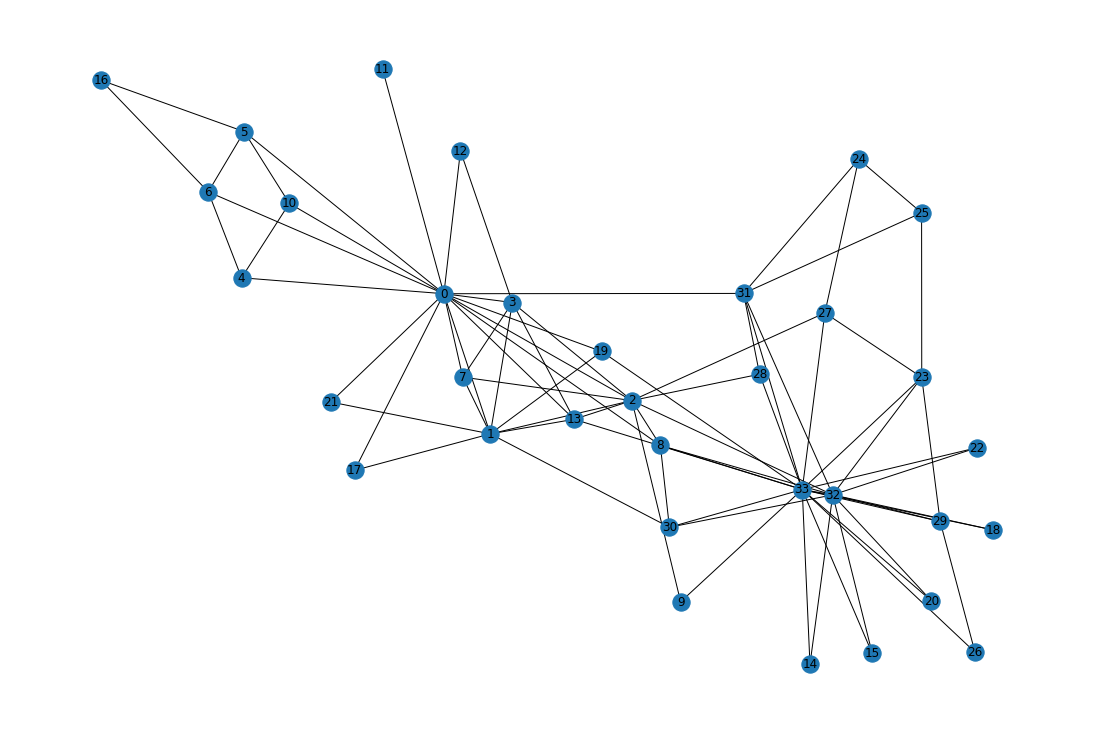

In [ ]:
nx.draw(G_karate, with_labels=True)
plt.show()

### Influencer Analysis

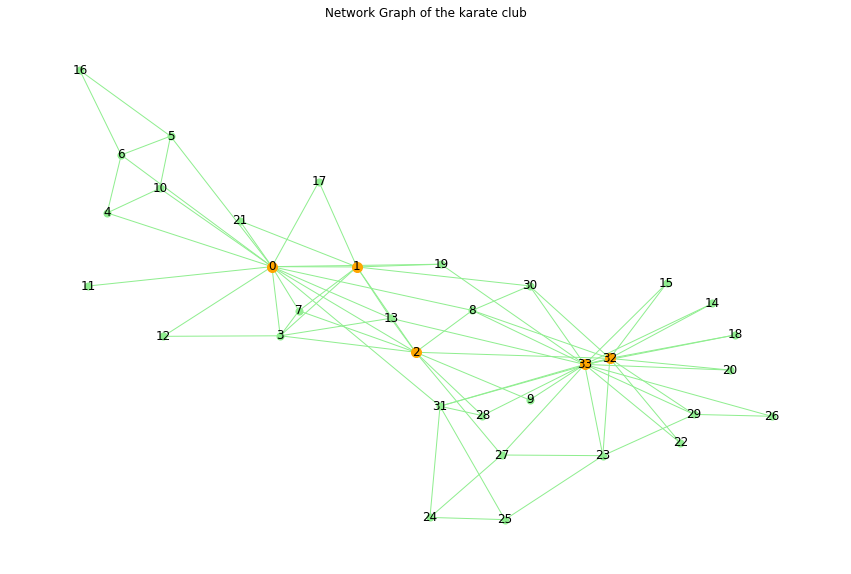

In [ ]:
# Define the influencer: if the degree of the nodes is great than 8, we consider the node as an influencer
# Color the influencers in orange

layout = nx.spring_layout(G_karate,iterations=50,scale=2)
# draw all nodes
nx.draw_networkx_nodes(G_karate, layout, nodelist=G_karate.nodes, node_color='lightgreen', node_size=50)
# draw influencers
influencers = [node for node in G_karate.nodes if G_karate.degree(node) > 8]
nx.draw_networkx_nodes(G_karate, layout, nodelist=influencers, node_color='orange', node_size=100)
# draw edges
nx.draw_networkx_edges(G_karate, layout, width=1, edge_color="lightgreen")
nx.draw_networkx_labels(G_karate, layout)

plt.axis('off')
plt.title("Network Graph of the karate club")
plt.show()

#### Try to define the infuencer by yourself and explore more

In [ ]:
# write your code here
# hint: use one of the centralities to give the definition

### Community Detection

We can use NetworkX provided functions for computing and measuring community structure. Here is the example of analyzing and visualizing the communities inside the karate club graph.


In [ ]:
from networkx.algorithms import community

import random
from numpy import random as nprand
random.seed(123)
nprand.seed(123)


# Find the communities
# communities = sorted(community.greedy_modularity_communities(G_karate), key=len, reverse=True)
communities = community.greedy_modularity_communities(G_karate)
# Count the communities
print(f"The karate club has {len(communities)} communities.")
print(communities)

The karate club has 3 communities.
[frozenset({8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}), frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21}), frozenset({0, 16, 19, 4, 5, 6, 10, 11})]


In [ ]:
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1
def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0
def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

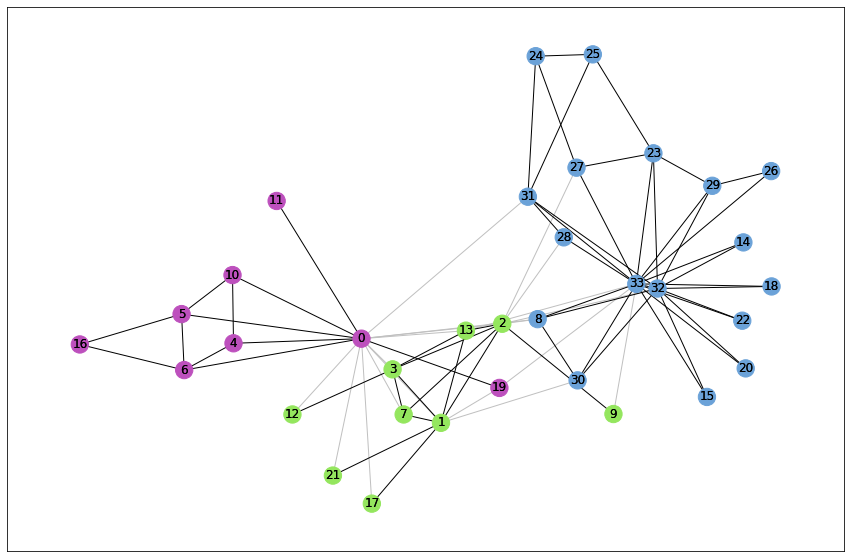

In [ ]:
# Set node and edge communities
set_node_community(G_karate, communities)
set_edge_community(G_karate)
node_color = [get_color(G_karate.nodes[v]['community']) for v in G_karate.nodes]
# Set community color for edges between members of the same community (internal) and intra-community edges (external)
external = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] > 0]
internal_color = ['black' for e in internal]
karate_pos = nx.spring_layout(G_karate)
plt.rcParams.update({'figure.figsize': (15, 10)})
# Draw external edges
nx.draw_networkx(
    G_karate,
    pos=karate_pos,
    node_size=0,
    edgelist=external,
    edge_color="silver")
# Draw nodes and internal edges
nx.draw_networkx(
    G_karate,
    pos=karate_pos,
    node_color=node_color,
    edgelist=internal,
    edge_color=internal_color)
plt.show()

#### Try to use other algorithm to conduct community detection and visualize the results

In [ ]:
# Write the code here